<a href="https://colab.research.google.com/github/alirezajafarineysiani/DNN/blob/main/DNN_HWP_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

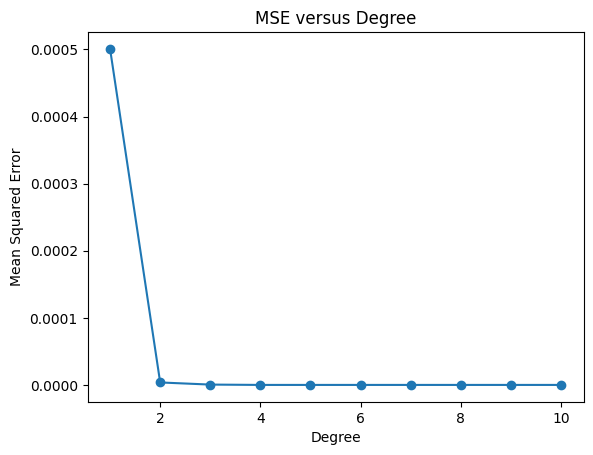

   Degree           MSE
0       1  5.008551e-04
1       2  3.676302e-06
2       3  5.015331e-07
3       4  5.327624e-10
4       5  1.627139e-10
5       6  2.395278e-12
6       7  2.965637e-14
7       8  2.588297e-15
8       9  1.589399e-18
9      10  1.230093e-18


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Importing pandas for creating a table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_poly_features(samples, degree):
    """
    Generate polynomial features up to the specified degree.

    Parameters:
    - samples: Input samples (1D array)
    - degree: Degree of the polynomial

    Returns:
    - X: Matrix of polynomial features
    """
    num_samples = len(samples)
    X = np.zeros((num_samples, degree + 1))

    for i in range(degree + 1):
        for j in range(num_samples):
            X[j, i] = samples[j] ** i

    return X

# Generating sample data with one covariate variable
np.random.seed(42)
samples = np.random.rand(100, 1)
y = np.tanh(samples)
degrees = range(1, 11)  # Degrees from 1 to 10
mse_values = []

for degree in degrees:
    X = generate_poly_features(samples, degree)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a linear regression model
    model = LinearRegression()

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting MSE versus degree
plt.plot(degrees, mse_values, marker='o')
plt.title('MSE versus Degree')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.show()

# Creating a DataFrame (table) to display the results
results_df = pd.DataFrame({'Degree': degrees, 'MSE': mse_values})
print(results_df)
